In [1]:
#Python libraries required for various operations
import numpy as np

#Qiskit packages used for building a quantum circuit
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit

#Qiskit packages used to execute and simulate the quantum circuit
from qiskit import execute, Aer

#Qiskit packages used to visualize and analyze results
from qiskit.visualization import plot_histogram

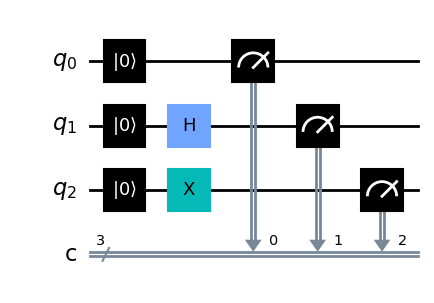

In [2]:
# create a quantum register with x = 3 qubits
qreg_q = QuantumRegister(3, 'q') 

# classical regoster to store the results
creg_c = ClassicalRegister(3, 'c')

# Initialize quantum circuit
circuit = QuantumCircuit(qreg_q, creg_c)

# Initialize all qubits to |0>
circuit.reset(qreg_q)

# apply gate 1 at pos x = 2
# gates available ->  (h,x,z)
circuit.x(qreg_q[2])

circuit.h(qreg_q[1])

# CNOT gate 
# circuit.cx(qreg_q[0],qreg_q[1])

#Apply measurement
circuit.measure(qreg_q, creg_c)

#Visualize the constructed circuit
circuit.draw()

In [5]:
# Use Aer's qasm_simulator
simulator = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator
'''
Define the appropriate number of shots in place of * for your experiment 
'''
job = execute(circuit, simulator, shots=100000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(circuit)
print("\n Output counts:",counts)


 Output counts: {'110': 50078, '100': 49922}


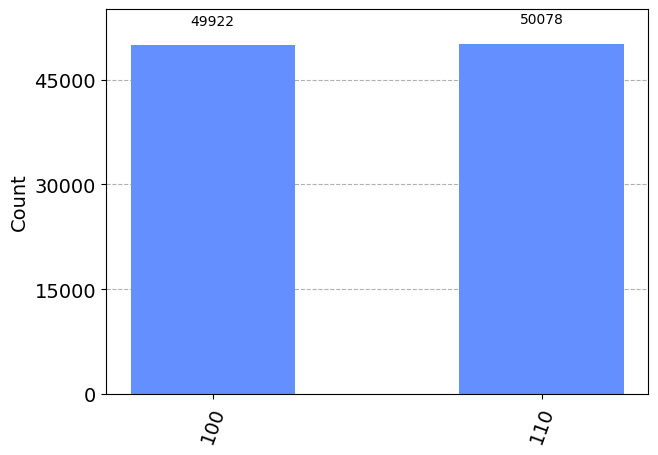

In [6]:
# Plot a histogram
plot_histogram(counts)